In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pystan
from matplotlib import rc
rc('text', usetex=True)

pd.set_option('display.max_columns', 100)

random_array = np.random.normal(0.0, 0.02, 20)
random_array

aa2codon = {                                                         # DNA codon table
    'A' : ['GCT', 'GCC', 'GCA', 'GCG'],
    'R' : ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
    'N' : ['AAT', 'AAC'],
    'D' : ['GAT', 'GAC'],
    'C' : ['TGT', 'TGC'],
    'E' : ['GAA', 'GAG'],
    'Q' : ['CAA', 'CAG'],
    'G' : ['GGT', 'GGC', 'GGA', 'GGG'],
    'H' : ['CAT', 'CAC'],
    'I' : ['ATT', 'ATC', 'ATA'],
    'L' : ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
    'K' : ['AAA', 'AAG'],
    'M' : ['ATG'],
    'F' : ['TTT', 'TTC'],
    'P' : ['CCT', 'CCC', 'CCA', 'CCG'],
    'S' : ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
    'T' : ['ACT', 'ACC', 'ACA', 'ACG'],
    'W' : ['TGG'],
    'Y' : ['TAT', 'TAC'],
    'V' : ['GTT', 'GTC', 'GTA', 'GTG'],
    '*' : ['TAA', 'TGA', 'TAG'],
    '-' : ['---'],
    }

init_pop = pd.read_csv("./outputs/simulation/init_sampling.csv")
codon_list = init_pop.columns[2:]
key_list = list(aa2codon.keys())
val_list = list(aa2codon.values())
WT_seq = []
for i in range(init_pop.shape[0]):
    list_of_keys = [key for key, list_of_values in aa2codon.items() if init_pop['wildtype'].tolist()[i] in list_of_values][0]
    WT_seq.append(list_of_keys)

df_col = []
for i in range(len(codon_list)):
    list_of_keys = [key for key, list_of_values in aa2codon.items() if codon_list[i] in list_of_values][0]
    df_col.append(list_of_keys)
    #position = val_list.index(100)
    
df_seperate = []
for i in range(len(codon_list)):
    df_seperate.append(init_pop[['site', 'wildtype', codon_list[i]]])

for i in range(len(codon_list)):
    df_seperate[i] = df_seperate[i].rename(columns = {df_seperate[i].columns[2]: [key for key, list_of_values in aa2codon.items() if df_seperate[i].columns[2] in list_of_values][0]})
    temp_list = []
    for j in range(init_pop.shape[0]):
        temp_list.append(df_seperate[i].columns[2])
    df_seperate[i]['AA'] = temp_list
    
df_AA = df_seperate[0].copy()
for i in range(len(codon_list)-1):
    df_AA = pd.concat([df_AA, df_seperate[i+1]]).groupby(['site', 'wildtype', 'AA']).sum().reset_index()
df_AA = df_AA.groupby(['site', 'wildtype']).sum().reset_index()

total_count = df_AA[df_AA.columns[2:]].T.sum().tolist()
df_AA['total_counts'] = total_count


df_temp = df_AA.copy()
df_temp = df_temp.drop('total_counts', axis=1)
AA_list = df_temp.columns[2:]
df_distribution = df_temp[AA_list]
df_distribution = df_distribution.T
arr = df_distribution.values
arr.sort(axis=0)
arr = arr[::-1]

df_distribution = pd.DataFrame(arr, columns=df_distribution.columns)
df_distribution

/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:67: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669
0,436363.0,437064.0,436469.0,437013.0,436983.0,436644.0,436768.0,436802.0,436286.0,437163.0,436833.0,436958.0,436212.0,436937.0,436565.0,436939.0,436773.0,435964.0,436779.0,436707.0,437358.0,436968.0,437294.0,437148.0,435829.0,436756.0,437266.0,436274.0,437747.0,436814.0,437155.0,435542.0,436515.0,436466.0,435281.0,436274.0,436366.0,421341.0,431323.0,433637.0,435091.0,433659.0,403742.0,415302.0,406736.0,413296.0,418489.0,350903.0,409586.0,416254.0,...,210561.0,209522.0,218191.0,214592.0,217988.0,216522.0,202751.0,200563.0,197799.0,190110.0,200160.0,129952.0,96157.0,131661.0,151361.0,166282.0,162639.0,189208.0,209711.0,211814.0,213893.0,211767.0,215793.0,219257.0,222014.0,222111.0,210061.0,213342.0,203625.0,223728.0,223085.0,222166.0,222981.0,222238.0,223187.0,221346.0,223653.0,222840.0,221726.0,223711.0,223564.0,223476.0,223653.0,223516.0,223699.0,223628.0,223997.0,223552.0,223703.0,223943.0
1,259.0,221.0,147.0,141.0,179.0,175.0,145.0,154.0,293.0,127.0,114.0,188.0,218.0,147.0,299.0,118.0,113.0,389.0,169.0,72.0,61.0,122.0,69.0,80.0,501.0,187.0,57.0,196.0,15.0,125.0,62.0,130.0,100.0,133.0,89.0,91.0,60.0,102.0,111.0,104.0,158.0,91.0,142.0,357.0,149.0,201.0,105.0,81.0,59.0,134.0,...,332.0,77.0,362.0,91.0,70.0,133.0,87.0,49.0,40.0,139.0,63.0,107.0,84.0,66.0,202.0,39.0,121.0,101.0,81.0,96.0,30.0,42.0,78.0,54.0,39.0,70.0,23.0,27.0,21.0,16.0,29.0,59.0,50.0,50.0,38.0,73.0,23.0,25.0,39.0,81.0,55.0,70.0,63.0,63.0,64.0,48.0,36.0,166.0,41.0,51.0
2,147.0,91.0,87.0,99.0,160.0,161.0,128.0,109.0,148.0,126.0,102.0,116.0,142.0,110.0,152.0,97.0,106.0,129.0,131.0,71.0,59.0,71.0,67.0,72.0,330.0,85.0,52.0,85.0,11.0,107.0,58.0,105.0,63.0,128.0,81.0,75.0,53.0,64.0,91.0,89.0,55.0,73.0,110.0,119.0,110.0,95.0,98.0,64.0,57.0,86.0,...,119.0,75.0,52.0,44.0,70.0,62.0,48.0,46.0,38.0,89.0,51.0,43.0,72.0,54.0,94.0,38.0,50.0,64.0,55.0,95.0,30.0,29.0,35.0,48.0,35.0,37.0,22.0,24.0,15.0,12.0,24.0,49.0,44.0,40.0,37.0,35.0,16.0,23.0,35.0,35.0,54.0,42.0,60.0,54.0,57.0,46.0,32.0,46.0,33.0,45.0
3,100.0,82.0,79.0,80.0,80.0,96.0,120.0,104.0,141.0,93.0,89.0,114.0,136.0,74.0,97.0,54.0,99.0,109.0,94.0,71.0,56.0,68.0,61.0,61.0,99.0,68.0,44.0,54.0,8.0,81.0,44.0,87.0,49.0,66.0,63.0,46.0,48.0,52.0,68.0,77.0,52.0,58.0,66.0,52.0,54.0,90.0,97.0,60.0,53.0,79.0,...,45.0,65.0,42.0,39.0,67.0,57.0,37.0,32.0,37.0,47.0,49.0,26.0,21.0,47.0,42.0,37.0,42.0,46.0,49.0,80.0,19.0,25.0,34.0,46.0,34.0,30.0,15.0,19.0,10.0,9.0,20.0,47.0,36.0,32.0,34.0,35.0,16.0,18.0,28.0,31.0,43.0,41.0,49.0,50.0,46.0,44.0,28.0,38.0,29.0,41.0
4,97.0,76.0,78.0,48.0,62.0,90.0,85.0,70.0,109.0,62.0,78.0,68.0,111.0,62.0,89.0,50.0,91.0,77.0,63.0,70.0,54.0,51.0,40.0,46.0,57.0,59.0,39.0,51.0,8.0,70.0,29.0,29.0,46.0,57.0,48.0,33.0,27.0,51.0,41.0,65.0,49.0,43.0,57.0,44.0,50.0,76.0,95.0,45.0,40.0,79.0,...,39.0,59.0,39.0,33.0,38.0,53.0,31.0,31.0,34.0,41.0,45.0,23.0,20.0,45.0,41.0,36.0,40.0,37.0,47.0,64.0,16.0,16.0,31.0,35.0,31.0,24.0,12.0,13.0,6.0,9.0,19.0,36.0,26.0,30.0,26.0,19.0,13.0,17.0,22.0,29.0,42.0,38.0,46.0,47.0,46.0,42.0,28.0,33.0,25.0,33.0
5,75.0,64.0,76.0,42.0,57.0,82.0,82.0,69.0,96.0,54.0,72.0,66.0,100.0,61.0,75.0,42.0,89.0,67.0,60.0,69.0,53.0,47.0,38.0,45.0,51.0,59.0,36.0,38.0,6.0,65.0,26.0,28.0,44.0,54.0,46.0,29.0,25.0,48.0,39.0,56.0,42.0,42.0,19.0,42.0,48.0,55.0,90.0,33.0,11.0,69.0,...,39.0,51.0,38.0,30.0,35.0,37.0,30.0,31.0,33.0,39.0,38.0,19.0,19.0,36.0,38.0,34.0,38.0,35.0,42.0,48.0,12.0,16.0,26.0,34.0,28.0,22.0,11.0,12.0,6.0,9.0,19.0,32.0,20.0,23.0,22.0,18.0,11.0,16.0,17.0,25.0,36.0,31.0,37.0,40.0,44.0,41.0,26.0,25.0,24.0,30.0
6,71.0,58.0,68.0,41.0,40.0,79.0,70.0,69.0,82.0,53.0,70.0,59.0,85.0,54.0,52.0,40.0,74.0,67.0,59.0,62.0,47.0,43.0,35.0,40.0,45.0,43.0,36.0,29.0,5.0,50.

In [2]:
model = """
data {
    int N;
    int K;
    int y[N,K];
}

parameters {
    simplex[K] theta;
}

model {
    for (i in 1:N) {
        y[i,] ~ multinomial(theta);
    } 
}
"""
multinomial = pystan.StanModel(model_code=model)



# true frequency distribution

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_78a200dd4b762d3294f98602e987e4aa NOW.


In [3]:
df_distribution_ = df_distribution.astype('int32')
df_multinomial = df_distribution_.T
data = df_multinomial.to_numpy()
input_data = {'N': len(data), 'K': len(data[0]), 'y': data}
fit = multinomial.sampling(data=input_data, iter=1000, chains=4, warmup=500, thin=1, seed=101)
print(fit)

random_sampling = np.random.randint(2000, size=20)
frequency_list = []
for i in range(len(random_sampling)):
    frequency_list.append([])
    for j in range(21):
        frequency_list[i].append(fit['theta['+str(j+1)+']'][i])

df_sampling = pd.DataFrame.from_records(frequency_list)
df_sampling

Inference for Stan model: anon_model_78a200dd4b762d3294f98602e987e4aa.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[1]     1.0  6.8e-8 3.2e-6    1.0    1.0    1.0    1.0    1.0   2185    1.0
theta[2]  3.6e-4  2.6e-8 1.4e-6 3.6e-4 3.6e-4 3.6e-4 3.7e-4 3.7e-4   2806    1.0
theta[3]  2.2e-4  2.0e-8 1.1e-6 2.2e-4 2.2e-4 2.2e-4 2.3e-4 2.3e-4   2979    1.0
theta[4]  1.8e-4  1.7e-8 9.6e-7 1.8e-4 1.8e-4 1.8e-4 1.8e-4 1.8e-4   3063    1.0
theta[5]  1.5e-4  1.5e-8 8.8e-7 1.5e-4 1.5e-4 1.5e-4 1.5e-4 1.5e-4   3554    1.0
theta[6]  1.4e-4  1.4e-8 8.4e-7 1.3e-4 1.4e-4 1.4e-4 1.4e-4 1.4e-4   3489    1.0
theta[7]  1.2e-4  1.5e-8 7.8e-7 1.2e-4 1.2e-4 1.2e-4 1.2e-4 1.2e-4   2628    1.0
theta[8]  1.1e-4  1.3e-8 7.6e-7 1.1e-4 1.1e-4 1.1e-4 1.1e-4 1.1e-4   3200    1.0
theta[9]  9.8e-5  1.3e-8 7.1e-7 9.7e-5 9.8e-5 9.8e-5 9.9e-510.0e-5   2974    1.0
the

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.998004,0.000364,0.000226,0.000179,0.000154,0.000136,0.000121,0.000110,0.000099,0.000087,0.000077,0.000070,0.000063,0.000058,0.000052,0.000047,0.000043,0.000038,0.000032,0.000026,0.000017
1,0.998005,0.000365,0.000224,0.000179,0.000153,0.000135,0.000122,0.000111,0.000098,0.000088,0.000077,0.000069,0.000062,0.000058,0.000053,0.000047,0.000042,0.000038,0.000032,0.000025,0.000017
2,0.998006,0.000368,0.000223,0.000177,0.000154,0.000136,0.000121,0.000111,0.000099,0.000087,0.000077,0.000069,0.000063,0.000057,0.000052,0.000047,0.000042,0.000038,0.000032,0.000026,0.000017
3,0.998003,0.000363,0.000225,0.000177,0.000155,0.000136,0.000122,0.000111,0.000098,0.000087,0.000077,0.000070,0.000063,0.000057,0.000053,0.000047,0.000042,0.000038,0.000032,0.000025,0.000017
4,0.998011,0.000363,0.000223,0.000179,0.000152,0.000137,0.000122,0.000109,0.000097,0.000086,0.000077,0.000069,0.000063,0.000058,0.000053,0.000046,0.000042,0.000037,0.000032,0.000025,0.000017
5,0.998003,0.000364,0.000224,0.000178,0.000154,0.000136,0.000123,0.000111,0.000098,0.000087,0.000077,0.000070,0.000063,0.000058,0.000052,0.000047,0.000043,0.000037,0.000032,0.000025,0.000018
6,0.998008,0.000364,0.000223,0.000176,0.000153,0.000135,0.000122,0.000111,0.000099,0.000086,0.000079,0.000070,0.000062,0.000057,0.000052,0.000048,0.000041,0.000037,0.000032,0.000025,0.000017
7,0.998005,0.000363,0.000223,0.000178,0.000154,0.000136,0.000123,0.000111,0.000098,0.000086,0.000077,0.000071,0.000063,0.000057,0.000052,0.000047,0.000042,0.000038,0.000032,0.000025,0.000017
8,0.998007,0.000365,0.000224,0.000177,0.000151,0.000135,0.000123,0.000111,0.000099,0.000086,0.000077,0.000070,0.000063,0.000058,0.000052,0.000047,0.000042,0.000037,0.000032,0.000025,0.000017
9,0.998005,0.000365,0.000225,0.000179,0.000151,0.000135,0.000124,0.000109,0.000097,0.000088,0.000078,0.000069,0.000062,0.000056,0.000053,0.000048,0.000042,0.000037,0.000032,0.000026,0.000018


In [4]:
# each entry of dataframe is one genotype/allele
np.random.seed(0)
df_selection = df_AA.copy().drop(['site','wildtype', 'total_counts'], axis=1)
columns = df_selection.columns
for index, row in df_selection.iterrows():
   # print(row)
    for column in columns:
        df_selection.loc[index, column] = np.random.normal(0.0, 0.1, 1)[0]
df_selection

#fix seed

,*,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.176405,0.040016,0.097874,0.224089,0.186756,-0.097728,0.095009,-0.015136,-0.010322,0.041060,0.014404,0.145427,0.076104,0.012168,0.044386,0.033367,0.149408,-0.020516,0.031307,-0.085410,-0.255299
1,0.065362,0.086444,-0.074217,0.226975,-0.145437,0.004576,-0.018718,0.153278,0.146936,0.015495,0.037816,-0.088779,-0.198080,-0.034791,0.015635,0.123029,0.120238,-0.038733,-0.030230,-0.104855,-0.142002
2,-0.170627,0.195078,-0.050965,-0.043807,-0.125280,0.077749,-0.161390,-0.021274,-0.089547,0.038690,-0.051081,-0.118063,-0.002818,0.042833,0.006652,0.030247,-0.063432,-0.036274,-0.067246,-0.035955,-0.081315
3,-0.172628,0.017743,-0.040178,-0.163020,0.046278,-0.090730,0.005195,0.072909,0.012898,0.113940,-0.123483,0.040234,-0.068481,-0.087080,-0.057885,-0.031155,0.005617,-0.116515,0.090083,0.046566,-0.153624
4,0.148825,0.189589,0.117878,-0.017992,-0.107075,0.105445,-0.040318,0.122245,0.020827,0.097664,0.035637,0.070657,0.001050,0.178587,0.012691,0.040199,0.188315,-0.134776,-0.127048,0.096940,-0.117312
5,0.194362,-0.041362,-0.074745,0.192294,0.148051,0.186756,0.090604,-0.086123,0.191006,-0.026800,0.080246,0.094725,-0.015501,0.061408,0.092221,0.037643,-0.109940,0.029824,0.132639,-0.069457,-0.014963
6,-0.043515,0.184926,0.067229,0.040746,-0.076992,0.053925,-0.067433,0.003183,-0.063585,0.067643,0.057659,-0.020830,0.039601,-0.109306,-0.149126,0.043939,0.016667,0.063503,0.238314,0.094448,-0.091282
7,0.111702,-0.131591,-0.046158,-0.006824,0.171334,-0.074475,-0.082644,-0.009845,-0.066348,0.112664,-0.107993,-0.114747,-0.043782,-0.049803,0.192953,0.094942,0.008755,-0.122544,0.084436,-0.100022,-0.154477
8,0.118803,0.031694,0.092086,0.031873,0.085683,-0.065103,-0.103424,0.068159,-0.080341,-0.068955,-0.045553,0.001748,-0.035399,-0.137495,-0.064362,-0.222340,0.062523,-0.160206,-0.110438,0.005217,-0.073956
9,0.154301,-0.129286,0.026705,-0.003928,-0.116809,0.052328,-0.017155,0.077179,0.082350,0.216324,0.133653,-0.036918,-0.023938,0.109966,0.065526,0.064013,-0.161696,-0.002433,-0.073803,0.027992,-0.009815


In [5]:
from numpy.linalg import inv 
from sklearn import datasets, linear_model 

def regression_(population_size, finite_sampling, generation, replicates, sample_index):
    trajectory = pd.DataFrame(columns = df_selection.columns)
    trajectory = trajectory.T
    select_list = df_selection.iloc[6]
    trajectory['selection_coefficients'] = select_list+1
    trajectory[0] = np.random.multinomial(population_size, df_sampling.iloc[sample_index].tolist())
    for i in range(generation):
        trajectory[i+1] = np.random.multinomial(population_size, 
                                                (((trajectory['selection_coefficients'])*trajectory[i])/((trajectory['selection_coefficients'])*trajectory[i]).sum()).values.tolist())

    inferred_selection = []
    inferred_log = []
    inferred_enrichment = []
    inferred_ratio = []
    inferred_regression=[]
    trajectory_save = trajectory[trajectory.columns[1:]]/population_size
    trajectory_save.to_csv('./outputs/simulation/WF_simulation.csv')
#     print(trajectory)

    directories = ['./outputs/simulation/WF_finite_sampling/'+'gen-%s_'%(generation+1)+'sampling-%s'%finite_sampling,
                   './outputs/simulation/WF_mutational_effects/selection_coefficients/',
                   './outputs/simulation/WF_mutational_effects/log_regression/',
                   './outputs/simulation/WF_mutational_effects/enrichment_ratio/',
                   './outputs/simulation/WF_mutational_effects/enrichment_ratio_log/',
                   './outputs/simulation/WF_mutational_effects/OLS_regression/']
    for directory in directories:
        if not os.path.exists(directory):
            os.makedirs(directory)
    # finite sampling
    for rep_num in range(replicates):
#         finite_sampling = abs(int(np.random.normal(finite_sampling, int(0.01*finite_sampling))))
#         print(finite_sampling)
        plot_list_ = trajectory[trajectory.columns[1:]].copy()
        plot_list_ = plot_list_/plot_list_[0].sum()
        plot_list = plot_list_.copy()
#         print(plot_list)
        for i in range(generation+1):
            prob = plot_list[i].tolist()
            sampling_list = np.random.multinomial(finite_sampling, prob)
            plot_list[i] = [(m+1)/(sampling_list.sum()+len(sampling_list)) for m in sampling_list]

        plot_list = plot_list.T
        regression_list = plot_list.copy().T
        for i in range(generation+1):
            regression_list[i] = np.log(regression_list[i])
        regression_list = regression_list.T
        regression_list['generation'] = [i for i in range(generation+1)]
        
        plot_list['generation'] = [i for i in range(generation+1)]

        plot_list.to_csv(directories[0]+'/rep-%s.csv' %rep_num)
        

        # frequency change
        freq_table = plot_list.drop('generation', axis=1).copy()
        
        freq_diff = freq_table.iloc[-1]-freq_table.iloc[0]
        freq_diff = np.array(freq_diff.tolist())
#         print(freq_diff)
        
        # ratio
        raw = freq_table.iloc[-1]/freq_table.iloc[0]
        inferred_ratio.append([i/sum(raw) for i in raw])
        
        # log enrich
        inferred_log.append([np.log(i/sum(raw)) for i in raw])


        # log regression
        df_regression = regression_list.copy()
        temp_enrich = []
        for i in df_regression.columns[:-1]:
            Y=df_regression[i].values.reshape(-1, 1)
            X=df_regression['generation'].values.reshape(-1, 1)
            #print(linear_model.LinearRegression().fit(X,Y).coef_[0][0])
            temp_enrich.append(linear_model.LinearRegression().fit(X,Y).coef_[0][0])
#         print('regress',temp_enrich)
        inferred_enrichment.append(temp_enrich)


        # OLS regression
        df_regression = plot_list.copy()
        temp_enrich = []
        for i in df_regression.columns[:-1]:
            Y=df_regression[i].values.reshape(-1, 1)
            X=df_regression['generation'].values.reshape(-1, 1)
            #print(linear_model.LinearRegression().fit(X,Y).coef_[0][0])
            temp_enrich.append(linear_model.LinearRegression().fit(X,Y).coef_[0][0])
#         print('regress',temp_enrich)
        inferred_regression.append(temp_enrich)

        # covariance/ vector
        cov_matx = np.zeros((21, 21))
        for gen in range(freq_table.shape[0]-1):
            variant_freq = freq_table.iloc[gen].tolist()
            for i in range(21):
                cov_matx[i,i]+=variant_freq[i]*(1-variant_freq[i])
                for j in range(i+1,21):
                    cov_matx[i,j]-=variant_freq[i]*variant_freq[j]
                    cov_matx[j,i]-=variant_freq[i]*variant_freq[j]

        selection = inv(cov_matx+np.identity(21)*0.01).dot(freq_diff)
        inferred_selection.append(selection)

    
    df_select = pd.DataFrame(inferred_selection)
    df_enrichment_regress = pd.DataFrame(inferred_enrichment)
    df_enrichment_ratio = pd.DataFrame(inferred_ratio)
    df_enrichment_OLS = pd.DataFrame(inferred_regression)
    df_enrichment_log = pd.DataFrame(inferred_log)
    
    df_select.to_csv('./outputs/simulation/WF_mutational_effects/selection_coefficients/'+'gen-%s_'%(generation+1)+'sampling-%s'%finite_sampling+'.csv')
    df_enrichment_regress.to_csv('./outputs/simulation/WF_mutational_effects/log_regression/'+'gen-%s_'%(generation+1)+'sampling-%s'%finite_sampling+'.csv')
    df_enrichment_ratio.to_csv('./outputs/simulation/WF_mutational_effects/enrichment_ratio/'+'gen-%s_'%(generation+1)+'sampling-%s'%finite_sampling+'.csv')
    df_enrichment_OLS.to_csv('./outputs/simulation/WF_mutational_effects/OLS_regression/'+'gen-%s_'%(generation+1)+'sampling-%s'%finite_sampling+'.csv')
    df_enrichment_log.to_csv('./outputs/simulation/WF_mutational_effects/enrichment_ratio_log/'+'gen-%s_'%(generation+1)+'sampling-%s'%finite_sampling+'.csv')
    

#     enrichment_ratio_corr = df_enrichment_ratio[df_enrichment_ratio.columns[1:]].T.corr(method='pearson')
#     log_regression_corr = df_enrichment_regress[df_enrichment_regress.columns[1:]].T.corr(method='pearson')
#     selection_coefficients_corr = df_select[df_select.columns[1:]].T.corr(method='pearson')
#     OLS_regression_corr = df_enrichment_OLS[df_enrichment_OLS.columns[1:]].T.corr(method='pearson')

    
    enrichment_ratio_corr = df_enrichment_ratio.T.corr(method='pearson')
    log_regression_corr = df_enrichment_regress.T.corr(method='pearson')
    selection_coefficients_corr = df_select.T.corr(method='pearson')
    OLS_regression_corr = df_enrichment_OLS.T.corr(method='pearson')
    enrichment_ratio_log_corr = df_enrichment_log.T.corr(method='pearson')


    
#     print("Selection correlation:")
#     sns.heatmap(sele_corr)
#     plt.show()
 
#     print("Enrichment ratio correlation:")
#     sns.heatmap(ratio_corr)
#     plt.show()

#     print("Enrichment regression correlation:")
#     sns.heatmap(regress_corr)
#     plt.show()


    print("Enrichment log regression replicates average correlation:")
    print((log_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates))

    print("Enrichment log scaled replicates average correlation:")
    print((enrichment_ratio_log_corr.sum().sum() - replicates)/(replicates*replicates-replicates))
#     print("Enrichment OLS regression replicates average correlation:")
#     print((OLS_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates))

    print("Enrichment ratio replicates average correlation:")
    print((enrichment_ratio_corr.sum().sum() - replicates)/(replicates*replicates-replicates))
    
    print("MPL replicates average correlation:")
    print((selection_coefficients_corr.sum().sum() - replicates)/(replicates*replicates-replicates))


# regression, same evolution but different finite sampling

In [6]:
rep_num = 1
generation = 10
finite_sampling = 1000
print('./outputs/simulation/WF_finite_sampling/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'/rep-%s.csv' %rep_num)

./outputs/simulation/WF_finite_sampling/gen-10_sampling-1000/rep-1.csv


In [7]:
import os
population_size = 400000000
finite_sampling = 10000
generation = 10
replicates = 100
sample_index = 10

generations=[1, 4, 9]
finite_list = [10000, 50000, 100000]

for generation in generations:
    for finite_sampling in finite_list:
        print(generation, finite_sampling)
        regression_(population_size, finite_sampling, generation, replicates, sample_index)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


1 10000
Enrichment log regression replicates average correlation:
0.0005230022897763755
Enrichment log scaled replicates average correlation:
0.0005230022897763741
Enrichment ratio replicates average correlation:
0.010273230635299684
MPL replicates average correlation:
0.025045197718869792
1 50000
Enrichment log regression replicates average correlation:
0.01225134917030006
Enrichment log scaled replicates average correlation:
0.012251349170300053
Enrichment ratio replicates average correlation:
0.01749150731616613
MPL replicates average correlation:
0.16432264027647478
1 100000
Enrichment log regression replicates average correlation:
0.01725956913489105
Enrichment log scaled replicates average correlation:
0.01725956913489103
Enrichment ratio replicates average correlation:
0.017247562012102938
MPL replicates average correlation:
0.20447968857892931
4 10000
Enrichment log regression replicates average correlation:
0.10746497390935518
Enrichment log scaled replicates average correlati

Text(0.5, 1.0, 'Consistency of the methods across 100 replicates')

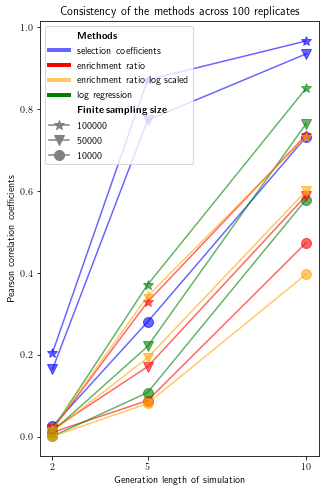

In [8]:
from matplotlib.lines import Line2D

replicates = 100
marker = ['o', 'v', '*']
generation_ = [i+1 for i in generations]
plt.figure(figsize=[5,8])
for finite_sampling in finite_list:
    temp = [[],[],[],[]]
    for generation in generation_:

        df_select = pd.read_csv('./outputs/simulation/WF_mutational_effects/selection_coefficients/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_regress = pd.read_csv('./outputs/simulation/WF_mutational_effects/log_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_ratio = pd.read_csv('./outputs/simulation/WF_mutational_effects/enrichment_ratio/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
#         df_enrichment_OLS = pd.read_csv('./outputs/simulation/WF_mutational_effects/OLS_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_ratio_log = pd.read_csv('./outputs/simulation/WF_mutational_effects/enrichment_ratio_log/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)

        enrichment_ratio_corr = df_enrichment_ratio[df_enrichment_ratio.columns[1:]].T.corr(method='pearson')
        log_regression_corr = df_enrichment_regress[df_enrichment_regress.columns[1:]].T.corr(method='pearson')
        selection_coefficients_corr = df_select[df_select.columns[1:]].T.corr(method='pearson')
#         OLS_regression_corr = df_enrichment_OLS[df_enrichment_OLS.columns[1:]].T.corr(method='pearson')
        enrichment_ratio_log_corr = df_enrichment_ratio_log[df_enrichment_ratio_log.columns[1:]].T.corr(method='pearson')
        
        enrichment_ratio_corr = (enrichment_ratio_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        log_regression_corr = (log_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        selection_coefficients_corr = (selection_coefficients_corr.sum().sum() - replicates)/(replicates*replicates-replicates)  
#         OLS_regression_corr = (OLS_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        enrichment_ratio_log_corr = (enrichment_ratio_log_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
#         temp1.append([enrichment_ratio_corr, log_regression_corr, selection_coefficients_corr, OLS_regression_corr])

#         plt.scatter([generation], [enrichment_ratio_corr], c='red')
#         plt.scatter([generation], [selection_coefficients_corr], c='blue')
#         plt.scatter([generation], [OLS_regression_corr], c='orange')      
#         plt.scatter([generation], [log_regression_corr], c='green')
        
        enrichment_ratio_corr = df_enrichment_ratio.T.corr(method='pearson')
        log_regression_corr = df_enrichment_regress.T.corr(method='pearson')
        selection_coefficients_corr = df_select.T.corr(method='pearson')
#         OLS_regression_corr = df_enrichment_OLS.T.corr(method='pearson')
        enrichment_ratio_log_corr = df_enrichment_ratio_log.T.corr(method='pearson')
        
        enrichment_ratio_corr = (enrichment_ratio_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        log_regression_corr = (log_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        selection_coefficients_corr = (selection_coefficients_corr.sum().sum() - replicates)/(replicates*replicates-replicates)  
#         OLS_regression_corr = (OLS_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        enrichment_ratio_log_corr = (enrichment_ratio_log_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        
        temp[0].append(enrichment_ratio_corr)
        temp[1].append(log_regression_corr)
        temp[2].append(selection_coefficients_corr)
        temp[3].append(enrichment_ratio_log_corr)
#         temp[3].append(OLS_regression_corr)
#         temp2.append([enrichment_ratio_corr, log_regression_corr, selection_coefficients_corr, OLS_regression_corr])

    plt.plot(generation_, temp[0], c='red', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)
    plt.plot(generation_, temp[1], c='green', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)
    plt.plot(generation_, temp[2], c='blue', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)      
    plt.plot(generation_, temp[3], c='orange', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)      
#     plt.plot(generation_, temp[3], c='green', label='OLS regression', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)
    plt.xlabel('Generation length of simulation')
    plt.ylabel('Pearson correlation coefficients')
    plt.xticks([2,5,10])
    
#     plt.legend()
#     plt.yscale('log')
#     plt.show()
legend_elements = [Line2D([0], [0], color='white', lw=0.1, label=r'$\textbf{Methods}$'),
                   Line2D([0], [0], color='blue', lw=4, label='selection coefficients', alpha=0.6),
                   Line2D([0], [0], color='red', lw=4, label='enrichment ratio'),
                   Line2D([0], [0], color='orange', lw=4, label='enrichment ratio log scaled', alpha=0.6),
                   Line2D([0], [0], color='green', lw=4, label='log regression'),
                   Line2D([0], [0], color='white', lw=0.1, label=r'$\textbf{Finite sampling size}$'),
                   Line2D([0], [0], marker='*', color='grey', label='100000', markersize=10),
                   Line2D([0], [0], marker='v', color='grey', label='50000', markersize=10),
                   Line2D([0], [0], marker='o', color='grey', label='10000', markersize=10)]
plt.legend(handles=legend_elements)
# plt.legend(handles=legend_elements)
plt.title('Consistency of the methods across 100 replicates')
    

In [22]:
import os
population_size = 400000000
finite_sampling = 10000
generation = 10
replicates = 100
sample_index = 10

generations=[1, 4, 9, 19]
finite_list = [10000, 50000, 100000]

for generation in generations:
    for finite_sampling in finite_list:
        print(generation, finite_sampling)
        regression_(population_size, finite_sampling, generation, replicates, sample_index)

1 10000
Enrichment log regression replicates average correlation:
0.0021222796828860844
Enrichment ratio replicates average correlation:
0.010551866524488984
MPL replicates average correlation:
0.02459007005617743
1 50000
Enrichment log regression replicates average correlation:
0.028134946844581614
Enrichment ratio replicates average correlation:
0.02823109573953382
MPL replicates average correlation:
0.2138963551015109
1 100000
Enrichment log regression replicates average correlation:
0.03404983983152845
Enrichment ratio replicates average correlation:
0.038071766772262476
MPL replicates average correlation:
0.2799188659331866
4 10000
Enrichment log regression replicates average correlation:
0.1367262252181636
Enrichment ratio replicates average correlation:
0.11709398786447683
MPL replicates average correlation:
0.37713140856751726
4 50000
Enrichment log regression replicates average correlation:
0.2757008242160962
Enrichment ratio replicates average correlation:
0.19341978766366258

Text(0.5, 1.0, 'Consistency of the methods across 100 replicates')

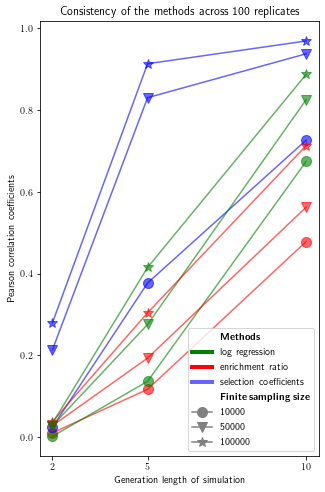

In [23]:
from matplotlib.lines import Line2D

replicates = 100
marker = ['o', 'v', '*']
generation_ = [i+1 for i in generations[:-1]]
plt.figure(figsize=[5,8])
for finite_sampling in finite_list:
    temp = [[],[],[],[]]
    for generation in generation_:

        df_select = pd.read_csv('./outputs/simulation/WF_mutational_effects/selection_coefficients/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_regress = pd.read_csv('./outputs/simulation/WF_mutational_effects/log_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_ratio = pd.read_csv('./outputs/simulation/WF_mutational_effects/enrichment_ratio/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_OLS = pd.read_csv('./outputs/simulation/WF_mutational_effects/OLS_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)

        enrichment_ratio_corr = df_enrichment_ratio[df_enrichment_ratio.columns[1:]].T.corr(method='pearson')
        log_regression_corr = df_enrichment_regress[df_enrichment_regress.columns[1:]].T.corr(method='pearson')
        selection_coefficients_corr = df_select[df_select.columns[1:]].T.corr(method='pearson')
        OLS_regression_corr = df_enrichment_OLS[df_enrichment_OLS.columns[1:]].T.corr(method='pearson')
        enrichment_ratio_corr = (enrichment_ratio_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        log_regression_corr = (log_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        selection_coefficients_corr = (selection_coefficients_corr.sum().sum() - replicates)/(replicates*replicates-replicates)  
        OLS_regression_corr = (OLS_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
#         temp1.append([enrichment_ratio_corr, log_regression_corr, selection_coefficients_corr, OLS_regression_corr])

#         plt.scatter([generation], [enrichment_ratio_corr], c='red')
#         plt.scatter([generation], [selection_coefficients_corr], c='blue')
#         plt.scatter([generation], [OLS_regression_corr], c='orange')      
#         plt.scatter([generation], [log_regression_corr], c='green')
        
        enrichment_ratio_corr = df_enrichment_ratio.T.corr(method='pearson')
        log_regression_corr = df_enrichment_regress.T.corr(method='pearson')
        selection_coefficients_corr = df_select.T.corr(method='pearson')
        OLS_regression_corr = df_enrichment_OLS.T.corr(method='pearson')
        enrichment_ratio_corr = (enrichment_ratio_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        log_regression_corr = (log_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        selection_coefficients_corr = (selection_coefficients_corr.sum().sum() - replicates)/(replicates*replicates-replicates)  
        OLS_regression_corr = (OLS_regression_corr.sum().sum() - replicates)/(replicates*replicates-replicates)
        temp[0].append(enrichment_ratio_corr)
        temp[1].append(log_regression_corr)
        temp[2].append(selection_coefficients_corr)
        temp[3].append(OLS_regression_corr)
#         temp2.append([enrichment_ratio_corr, log_regression_corr, selection_coefficients_corr, OLS_regression_corr])

    plt.plot(generation_, temp[0], c='red', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)
    plt.plot(generation_, temp[1], c='green', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)
    plt.plot(generation_, temp[2], c='blue', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)      
#     plt.plot(generation_, temp[3], c='green', label='OLS regression', marker=marker[finite_list.index(finite_sampling)], markersize=10, alpha=0.6)
    plt.xlabel('Generation length of simulation')
    plt.ylabel('Pearson correlation coefficients')
    plt.xticks([2,5,10])
    
#     plt.legend()
#     plt.yscale('log')
#     plt.show()
legend_elements = [Line2D([0], [0], color='white', lw=0.1, label=r'$\textbf{Methods}$'),
                   Line2D([0], [0], color='green', lw=4, label='log regression'),
                   Line2D([0], [0], color='red', lw=4, label='enrichment ratio'),
                   Line2D([0], [0], color='blue', lw=4, label='selection coefficients', alpha=0.6),
#                    Line2D([0], [0], color='green', lw=4, label='OLS regression', alpha=0.6),
                   Line2D([0], [0], color='white', lw=0.1, label=r'$\textbf{Finite sampling size}$'),
                   Line2D([0], [0], marker='o', color='grey', label='10000', markersize=10),
                   Line2D([0], [0], marker='v', color='grey', label='50000', markersize=10),         
                   Line2D([0], [0], marker='*', color='grey', label='100000', markersize=10)]
plt.legend(handles=legend_elements)
# plt.legend(handles=legend_elements)
plt.title('Consistency of the methods across 100 replicates')
    

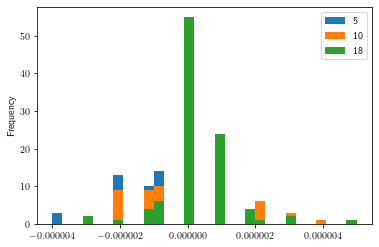

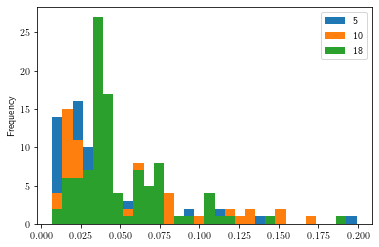

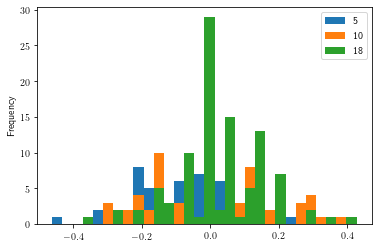

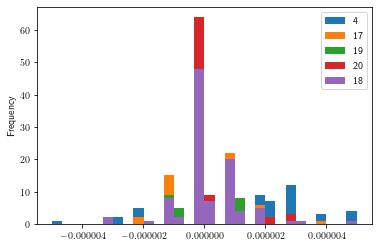

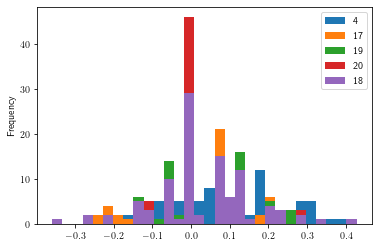

In [503]:
for finite_sampling in [10000]:
    temp = [[],[],[],[]]
    for generation in [5]:
        df_select = pd.read_csv('./outputs/simulation/WF_mutational_effects/selection_coefficients/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_regress = pd.read_csv('./outputs/simulation/WF_mutational_effects/log_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_ratio = pd.read_csv('./outputs/simulation/WF_mutational_effects/enrichment_ratio/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_OLS = pd.read_csv('./outputs/simulation/WF_mutational_effects/OLS_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
df_select

df_select[['5','10','18']].plot.hist(bins=30)
plt.show()
df_enrichment_ratio[['5','10','18']].plot.hist(bins=30)
plt.show()
df_enrichment_regress[['5','10','18']].plot.hist(bins=30)
plt.show()

df_select[index_temp[-5:]].plot.hist(bins=30)
plt.show()
df_enrichment_regress[index_temp[-5:]].plot.hist(bins=30)
plt.show()

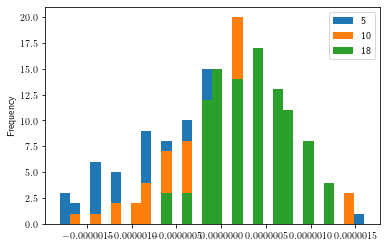

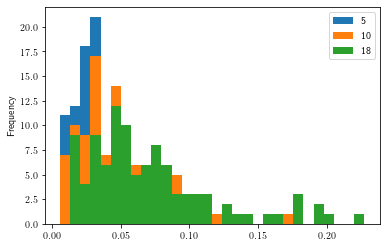

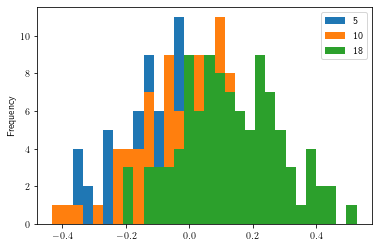

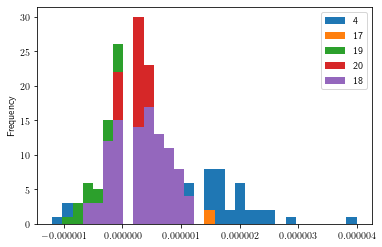

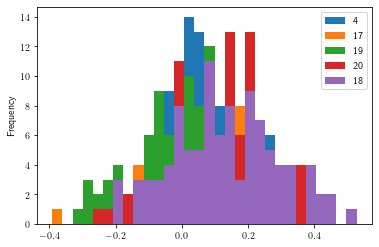

In [504]:
for finite_sampling in [50000]:
    temp = [[],[],[],[]]
    for generation in [5]:
        df_select = pd.read_csv('./outputs/simulation/WF_mutational_effects/selection_coefficients/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_regress = pd.read_csv('./outputs/simulation/WF_mutational_effects/log_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_ratio = pd.read_csv('./outputs/simulation/WF_mutational_effects/enrichment_ratio/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_OLS = pd.read_csv('./outputs/simulation/WF_mutational_effects/OLS_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
df_select

df_select[['5','10','18']].plot.hist(bins=30)
plt.show()
df_enrichment_ratio[['5','10','18']].plot.hist(bins=30)
plt.show()
df_enrichment_regress[['5','10','18']].plot.hist(bins=30)
plt.show()

df_select[index_temp[-5:]].plot.hist(bins=30)
plt.show()
df_enrichment_regress[index_temp[-5:]].plot.hist(bins=30)
plt.show()

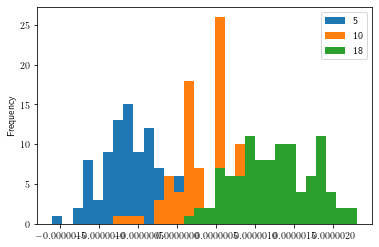

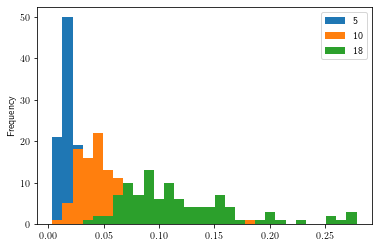

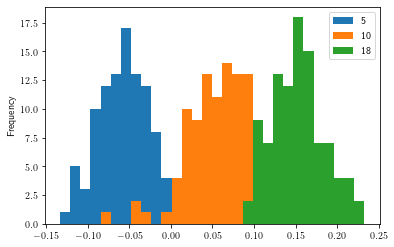

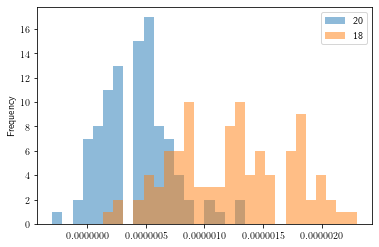

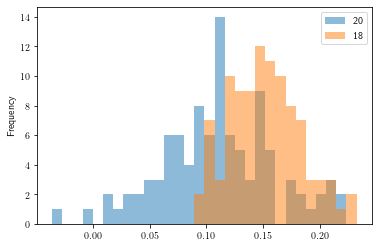

In [514]:
for finite_sampling in [100000]:
    temp = [[],[],[],[]]
    for generation in [10]:
        df_select = pd.read_csv('./outputs/simulation/WF_mutational_effects/selection_coefficients/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_regress = pd.read_csv('./outputs/simulation/WF_mutational_effects/log_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_ratio = pd.read_csv('./outputs/simulation/WF_mutational_effects/enrichment_ratio/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
        df_enrichment_OLS = pd.read_csv('./outputs/simulation/WF_mutational_effects/OLS_regression/'+'gen-%s_'%generation+'sampling-%s'%finite_sampling+'.csv', index_col=0)
df_select

df_select[['5','10','18']].plot.hist(bins=30)
plt.show()
df_enrichment_ratio[['5','10','18']].plot.hist(bins=30)
plt.show()
df_enrichment_regress[['5','10','18']].plot.hist(bins=30)
plt.show()

df_select[index_temp[-2:]].plot.hist(bins=30, alpha=0.5)
plt.show()
df_enrichment_regress[index_temp[-2:]].plot.hist(bins=30, alpha=0.5)
plt.show()

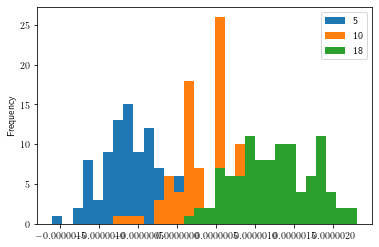

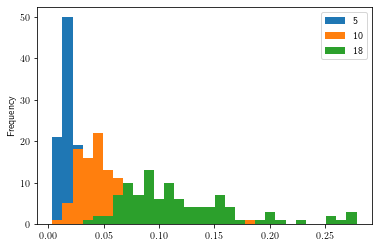

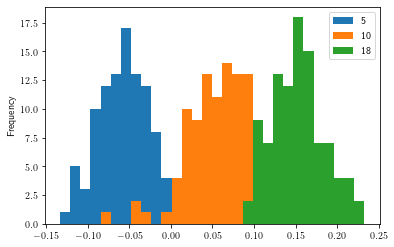

In [495]:
df_select[['5','10','18']].plot.hist(bins=30)
plt.show()
df_enrichment_ratio[['5','10','18']].plot.hist(bins=30)
plt.show()
df_enrichment_regress[['5','10','18']].plot.hist(bins=30)
plt.show()

In [501]:
temp = df_selection.iloc[7].sort_values().index.tolist()
AA_ = ['*', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
index_temp = [str(AA_.index(i)) for i in temp]
print(index_temp)
df_selection.iloc[7].sort_values()

['15', '2', '8', '3', '5', '12', '0', '9', '11', '14', '7', '10', '1', '13', '16', '6', '4', '17', '19', '20', '18']


R   -0.217691
C   -0.194295
I   -0.141228
D   -0.125826
F   -0.112851
N   -0.105405
*   -0.058376
K   -0.039409
M   -0.034472
Q   -0.027483
H   -0.022396
L   -0.004955
A    0.005514
P    0.006721
S    0.021322
G    0.042411
E    0.045770
T    0.052287
W    0.052639
Y    0.079462
V    0.123703
Name: 7, dtype: float64

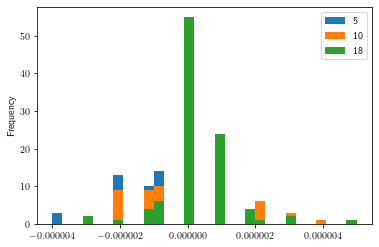

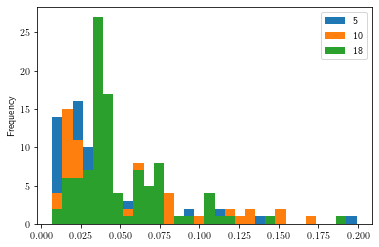

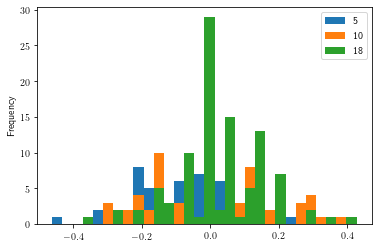

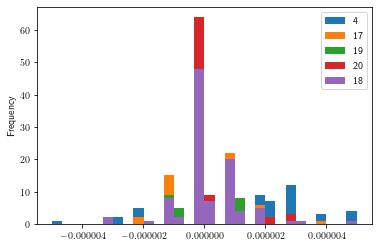

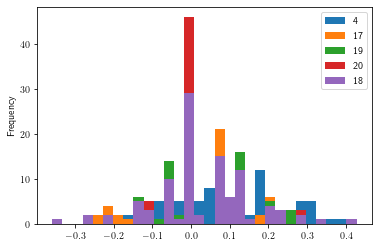

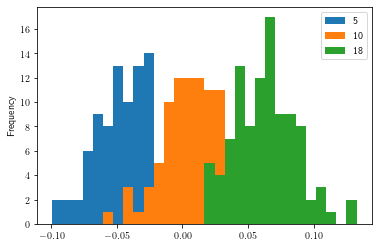

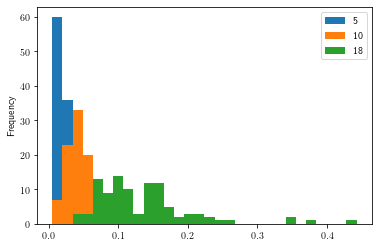

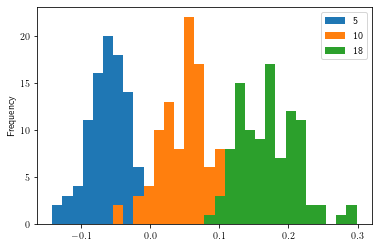

In [452]:
df_select[['5','10','18']].plot.hist(bins=30)
plt.show()
df_enrichment_ratio[['5','10','18']].plot.hist(bins=30)
plt.show()
df_enrichment_regress[['5','10','18']].plot.hist(bins=30)
plt.show()

In [393]:
population_size = 400000
finite_sampling = 100001
generation = 12
replicates = 100
sample_index = 10

regression_(population_size, finite_sampling, generation, replicates, sample_index)

Enrichment log regression replicates average correlation:
0.9597408365441888
Enrichment OLS regression replicates average correlation:
0.9997354040719908
Enrichment ratio replicates average correlation:
0.8401993271914885
MPL replicates average correlation:
0.9993735188434388


Selection correlation:


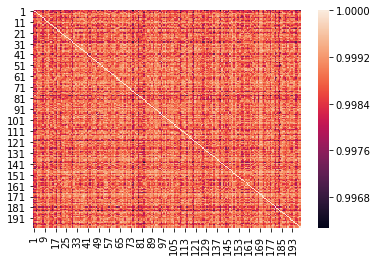

Enrichment ratio correlation:


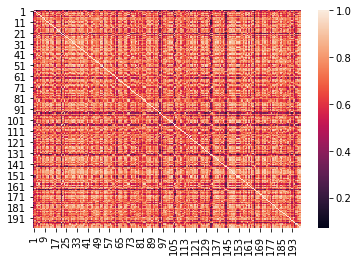

Enrichment regression correlation:


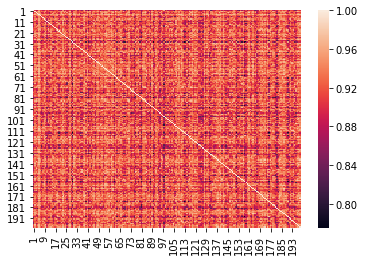

Enrichment log regression replicates average correlation:
0.9105394128467131
Enrichment OLS regression replicates average correlation:
0.9894500787988826
Enrichment ratio replicates average correlation:
0.7015388844647991
MPL replicates average correlation:
0.9888238220658573


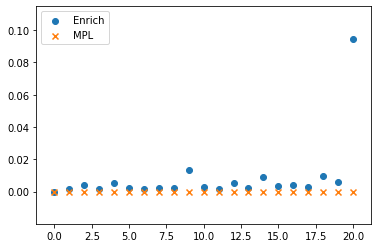

In [222]:
population_size = 400000000
finite_sampling = 100000
generation = 10
replicates = 200
sample_index = 10
cov_adj=1

selection_df, enrich_df = regression_(population_size, finite_sampling, generation, replicates, sample_index, cov_adj)

Selection correlation:


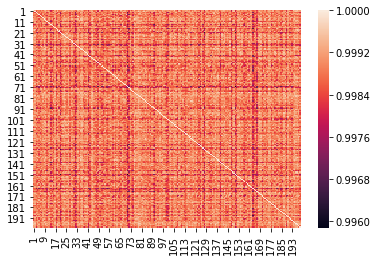

Enrichment ratio correlation:


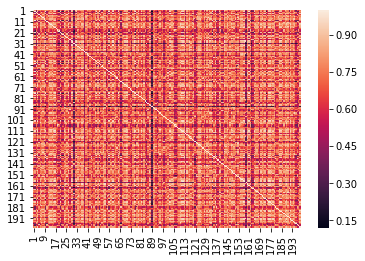

Enrichment regression correlation:


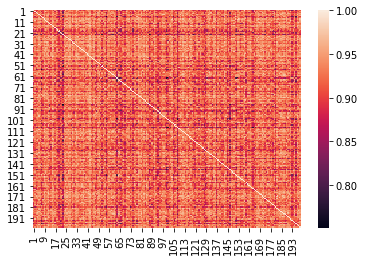

Enrichment regression replicates average correlation:
0.9121793766050209
Enrichment ratio replicates average correlation:
0.7004264822195385
MPL replicates average correlation:
0.9888302724924525


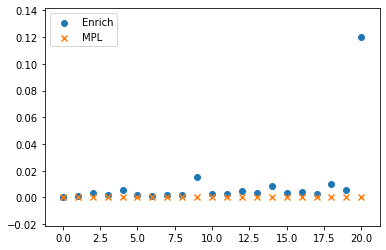

In [202]:
population_size = 400000000
finite_sampling = 100000
generation = 10
replicates = 200
sample_index = 10
cov_adj=1

selection_df, enrich_df = regression_(population_size, finite_sampling, generation, replicates, sample_index, cov_adj)

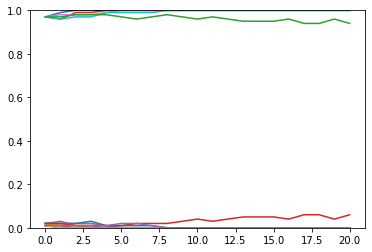

In [194]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

N = 100
T = 20


for _ in range(5):
    freqs = [[0.97,0.02,0.01]]
    for i in range(T):
#         print(freqs[-1])
        newn = np.random.multinomial(N, freqs[-1])
        newf = newn/N
        freqs.append(newf)

    t = range(len(freqs))
    freqs = np.array(freqs)

    for i in range(len(freqs[0])):
        sns.lineplot(t, freqs.T[i])
    
plt.ylim(0, 1);



In [181]:
print(np.random.multinomial(1, [0.997,0.0002,0.0008,0.002],size=20))

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [99]:
for i in range(10):
    print(np.random.multivariate_normal(mean=[100,200], cov=[[1/100, 0], [0, 1/100]]))
print(np.random.multivariate_normal(mean=[100,200], cov=[[0.1, -0.09], [-0.09, 0.9]], size=10))

[ 99.89892888 200.158025  ]
[ 99.77650141 199.7841725 ]
[100.05171271 199.94638803]
[100.01693023 200.25097362]
[100.01361754 199.94512612]
[ 99.96778113 200.11346027]
[ 99.81751624 200.15396944]
[100.02226771 199.98905305]
[100.0572731 200.1019034]
[100.2159454  200.02013701]
[[ 99.87932044 200.69543321]
 [100.33565648 200.64516753]
 [ 99.85707694 200.21779476]
 [100.60575187 199.73072889]
 [100.00851085 201.6496307 ]
 [100.36166744 200.063986  ]
 [100.36478688 199.22467166]
 [100.08145231 199.88099303]
 [ 99.97350065 200.83995333]
 [ 99.97678963 199.96901329]]


*    39920524
A       14445
C        8941
D        6886
E        6074
F        5470
G        4918
H        4417
I        3913
K        3491
L        3050
M        2652
N        2558
P        2339
Q        2129
R        1930
S        1704
T        1552
V        1260
W        1092
Y         655
Name: 0, dtype: int64
Enrichment correlation:


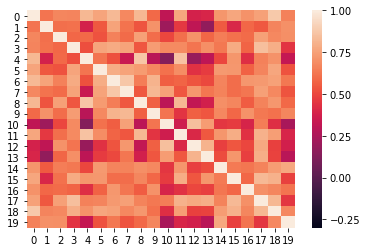

Selection correlation:


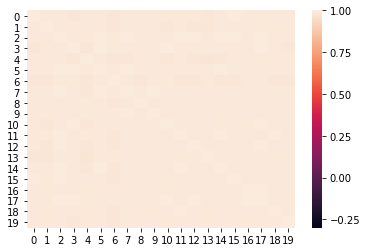

Enrichment replicates average correlation:
0.6109060241614618
MPL replicates average correlation:
0.9903531607165178


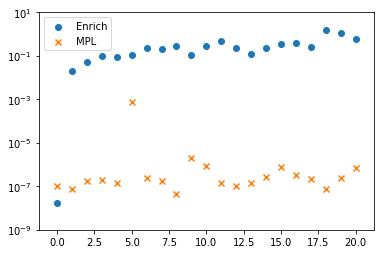

In [16]:
population_size = 40000000
finite_sampling = 200000
generation = 10
replicates = 20
sample_index = 10

ratio_(population_size, finite_sampling, generation, replicates, sample_index)